# Different plots

In [16]:
from pylab import *
import multiprocessing as mp
import pickle
import datetime
import gzip
%matplotlib inline

In [17]:
tickers=["AAL", "AAPL","ADBE","ADI", "ADP", "ADSK","AKAM","ALXN","AMAT","AMGN",
         "AMZN","ATVI","AVGO","BBBY","BIDU","BIIB","BMRN","CA",  "CELG","CERN",
        "CHKP","CHRW","CHTR","CMCSA","COST","CSCO","CTSH","CTXS","DISCA","DISH",
         "DLTR","EA",  "EBAY","EQIX","ESRX","EXPD","FAST","FB",  "FISV","FOXA",
         "GILD","GOOG","GRMN","HSIC","ILMN","INTC","INTU","ISRG","JD",  "KHC",
         "KLAC","LBTYA","LLTC","LMCA","LRCX","LVNTA","MAR","MAT","MDLZ","MNST",
         "MSFT","MU",  "MYL", "NFLX","NTAP","NVDA","NXPI","ORLY","PAYX","PCAR",
         "PCLN","QCOM","REGN","ROST","SBAC","SBUX","SIRI","SNDK","SPLS","SRCL",
         "STX", "SYMC","TRIP","TSCO","TSLA","TXN", "VIAB","VIP", "VOD", "VRSK",
         "VRTX","WDC", "WFM", "WYNN","XLNX","YHOO"]

days=['07','08','09','10','11']

In [18]:
### Load data
print(tickers[0], days[0])

data = genfromtxt(gzip.open('../2016/201603%s_%s.csv.gz' % (days[0],tickers[0])), dtype='str', skip_header = 1, delimiter = ',')


### Lists of times, ids etc.
times_= array([int(mytime) for mytime in data[:,0]])
ids_ = array([int(myid) for myid in data[:,2]])
types_ = array([1 * (mytype == 'B') + 
                2 * (mytype == 'S') +
                3 * (mytype == 'E') +
                4 * (mytype == 'C') +
                5 * (mytype == 'F') +
                6 * (mytype == 'D') +
                7 * (mytype == 'X') +
                8 * (mytype == 'T') for mytype in data[:,3]])
volumes_ = array([int(myvolume) for myvolume in data[:,4]])
prices_ = array([int(myprice) for myprice in data[:,5]])

ids = ids_[types_<3]
times = times_[types_<3]
types = types_[types_<3]
volumes = volumes_[types_<3]
prices = prices_[types_<3]

AAL 07


In [19]:
volumes[types == 2] = -1 * volumes[types == 2]
prices = prices / 10000

(0, 100)

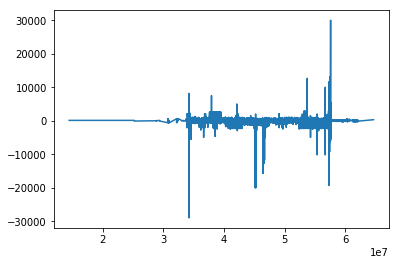

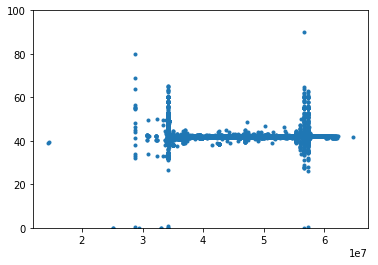

In [20]:
figure()
plot(times,volumes)
figure()
plot(times,prices, '.')
ylim(0,100)


In [21]:
sum(volumes)

-2332347

In [22]:
day_times_ind = (1. * times / 3600 / 1000 > 9.5) * (1. * times / 3600 / 1000 < 16) > 0

times = times[day_times_ind] / 3600 / 1000
volumes = volumes[day_times_ind]        

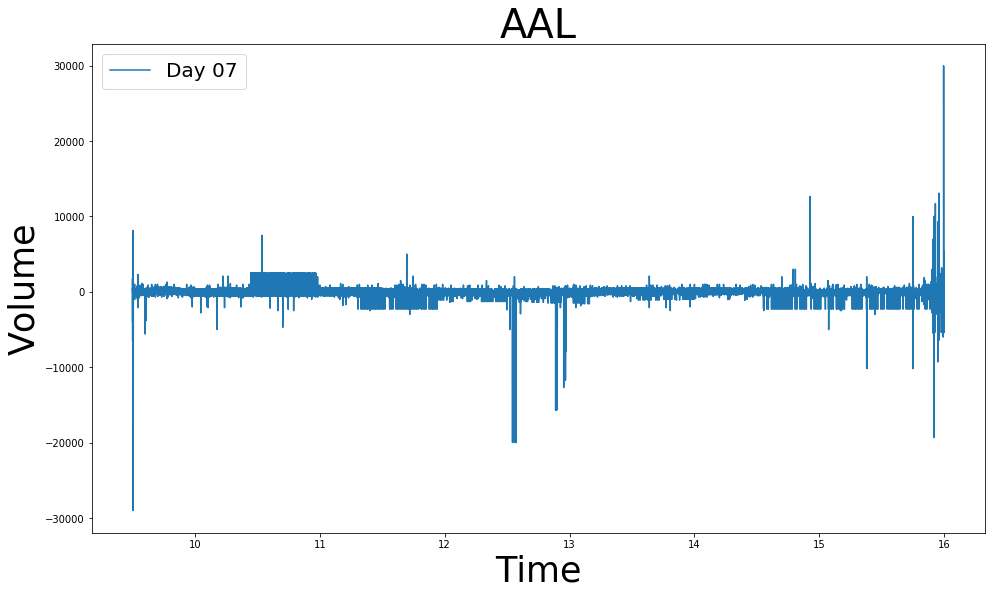

In [23]:
figure(figsize=(16,9))

title('%s' %tickers[0], fontsize=40)
plot(times, volumes, label=('Day %s' %days[0]))
xlabel('Time', fontsize=35)
ylabel('Volume', fontsize=35)
legend(loc=0,fontsize=20)

In [24]:
sum(volumes)

-2336188